# Predicting	Consumer	Choice


Consumer	choice	is	part	of	life	and	fundamental	to	marketing	data	science.	If	we	are	lucky enough,	we	choose	where	we	live,	whether	we	rent	an	apartment	or	buy	a	house.	We	choose jobs,	associations,	friends,	and	lovers.	Diet	and	exercise,	health	and	fitness,	everything	from breakfast	cereal	to	automobiles—these	are	the	vicissitudes	of	choice.	And	many	of	the	choices we	make	are	known	to	others,	a	record	of	our	lives	stored	away	in	corporate	databases.

To	predict	consumer	choice,	we	use	explanatory	variables	from	the	marketing	mix,	such	as product	characteristics,	advertising	and	promotion,	or	the	type	of	distribution	channel.	We note	consumer	characteristics,	observable	behaviors,	survey	responses,	and	demographic data.	We	build	the	discrete	choice	models	of	economics	and	generalized	linear	models	of statistics—essential	tools	of	marketing	data	science. 

To	demonstrate	choice	methods,	we	begin	with	the	Sydney	Transportation	Study	from appendix	C	(page	375).	Commuters	in	Sydney	can	choose	to	go	into	the	city	by	car	or	train. The	response	is	binary,	so	we	can	use	logistic	regression,	a	generalized	linear	model	with	a logit	(pronounced	“low	jit”)	link.	The	logit	is	the	natural	logarithm	of	the	odds	ratio.

In	the	Sydney	Transportation	Study,	we	know	the	time	and	cost	of	travel	by	car	and	by	train. These	are	the	explanatory	variables	in	the	case.	The	scatter	plot	matrix	in figure below

In [7]:
# Predicting Commuter Transportation Choices (Python)

# import packages into the workspace for this program
from __future__ import division, print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# read data from comma-delimited text file... create DataFrame object
sydney = pd.read_csv("sydney.csv")

# check input DataFrame
sydney.head()

,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,TRAIN
1,50,230,60,32,TRAIN
2,50,70,58,40,CAR
3,60,108,93,62,CAR
4,70,60,68,26,TRAIN


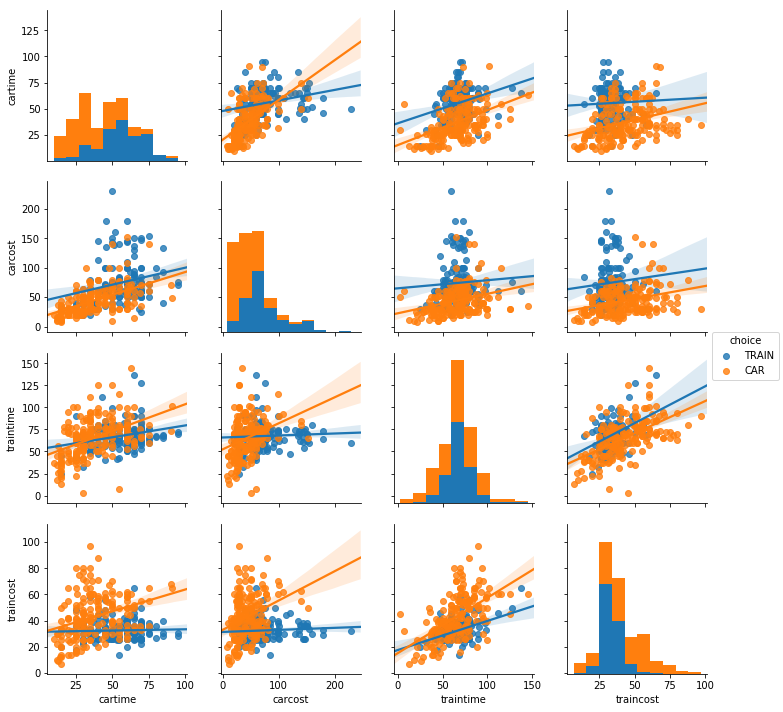

In [8]:
sns.pairplot(sydney,hue='choice',kind='reg')

In [9]:
# dictionary object to convert string to binary integer 
response_to_binary = {'TRAIN':1, 'CAR':0}

y = sydney['choice'].map(response_to_binary)
cartime = sydney['cartime']
carcost = sydney['carcost']
traintime = sydney['traintime']
traincost = sydney['traincost']

# define design matrix for the linear predictor
Intercept = np.array([1] * len(y))
x = np.array([Intercept, cartime, carcost, traintime, traincost]).T

# generalized linear model for logistic regression
logistic_regression = sm.GLM(y, x, family=sm.families.Binomial())
sydney_fit = logistic_regression.fit()
print(sydney_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 choice   No. Observations:                  333
Model:                            GLM   Df Residuals:                      328
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.32
Date:                Sun, 17 Feb 2019   Deviance:                       272.63
Time:                        12:39:47   Pearson chi2:                     326.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4440      0.585     -2.468      0.014      -2.591      -0.297
x1             0.0565      0.011      5.179      0.0

In [4]:
sydney['train_prob'] = sydney_fit.predict(linear = False)

# function to convert probability to choice prediction
def prob_to_response(response_prob, cutoff):
    if(response_prob > cutoff):
        return('TRAIN')
    else:
        return('CAR')
            
# add binary predictions to DataFrame sydney using cutoff value for the case
sydney['choice_pred'] = sydney['train_prob'].apply(lambda d: prob_to_response(d, cutoff = 0.50))
    
# evaluate performance of logistic regression model    
# obtain confusion matrix and proportion of observations correctly predicted    
cmat = pd.crosstab(sydney['choice_pred'], sydney['choice']) 
a = float(cmat.iloc[0,0])
b = float(cmat.iloc[0,1])
c = float(cmat.iloc[1,0]) 
d = float(cmat.iloc[1,1])
n = a + b + c + d
predictive_accuracy = (a + d)/n  

print(cmat)
print('\n Percentage Correctly Predicted', round(predictive_accuracy, 3), "\n")

choice       CAR  TRAIN
choice_pred            
CAR          155     30
TRAIN         28    120

 Percentage Correctly Predicted 0.826 

